# 1. Introduction

The main task in this project is to predict if a particular person would have survived in the titanic crush. We will use the given training data to develop a high performance predictive model.In this project, one can learn retrieving csv file, how to drop and add features to the dataset, identifying the numerical and categorical variables, identifying missing data, replacing missing data, transformation (mapping) of categorical variables into equivalent numerical values, transforming variable ranges into discrete bins, correlation between all features and survival, correlation between each features (Heat map), feature engineering, 10 predictive models, model evaluation and selection, parameter tuning for the selected model, KFold cross-validation for the selected model, variable importance for the proposed model, predicting the target value (Survival of the test data), and submitting the final results.

## 1.1 Goal

The goal of this project:

 1. To study the correlation between the survival rate and the features
 2. To identify the most correlated and least correlated features
 3. To propose a predictive model
 4. To practice machine learning algorithms

Some notes:

- On the outset some of the features may not have direct correlation to survival such as:  
    - name of a person, passenger ID, ticket 
- Some of the features may not have full/major set of data such as Cabin with multiple null 

As Feature Engineering:

- We will consider the correlation between survival and the size of family. Hence, we will create a new FamilySize feature
- We will consider the correlation between title of the passenger and survival. We will also create a new Title feature

Transforming of categorical variables into their corresponding numeric values:
- Dividing the age into range of ages.
- Similarly dividing the fare into range (number of bins)  

# 1.2 ASSUMPTIONS AND DESCRIBTION

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking.

1. Children are more likely to survive more
2. Female are more likely to survive 
3. First class passengers are more likely to survive 

## 1.3 Import Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid", color_codes = True)
np.random.seed(sum(map(ord, "palettes")))

#plotly
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

from sklearn.metrics import roc_auc_score

#Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold


/usr/local/anaconda3/envs/szczygiel/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.

/usr/local/anaconda3/envs/szczygiel/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.



## 1.4 Data Retriving and Exploration

####  Peek into the Data:

In [2]:
train = pd.read_csv("/Users/klaudiaszczygiel/data_science/Projekt_ML/Titanic_dataset/train.csv")
test = pd.read_csv("/Users/klaudiaszczygiel/data_science/Projekt_ML/Titanic_dataset/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape, test.shape

((891, 12), (418, 11))

** Some insights :**
* The data set consists of 12 attributes (PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked)
    1. PassengerId - Numeric data, it is unique for each passenger, not useful.
    2. Survived - Target data to be predicted, with incators 0 (Passenger Died) or 1 (Passenger Survived).
    3. Pclass - Numeric data, has 3 categories (1st, 2nd or 3rd), useful.
    4. Name - String data type, mostly unique for each passenger, not useful.
    5. Sex - Categorical data, has 2 categories (male, female), useful.
    6. Age - Numeric data, max age is 80, it contains few nulls (can be imputed), useful.
    7. SibSp - Numeric data, max number of siblings / spouses aboard is 8, useful.
    8. Parch - Numeric data, max number of parents / children aboard is 6, useful.
    9. Ticket - Categorical data, it has a prefix to the number,  it can be useful.
    10. Fare - Numeric data, higher the class, higher is the fare (need to check), max fare is 512,32 (currency is $ I guess) , useful.
    11. Cabin - Categorical data, it contains few nulls (can be imputed), it can be useful.
    12. Embarked - Categorical data, with 3 categories, C = Cherbourg, Q = Queenstown, S = Southampton, it contains few nulls (can be imputed), useful. 
* The attribute 'Survived' would be the attribute to be predicted, i.e, target attribute.
* Based on the values in the target attribute, i.e., 0/1 which states if the passenger survived or not, it is a Binary Classification.

#### Summary of the data:

For the train data, the numerical features are PassengerId, pclass, Age, sibSp, Parch, and Fare.

In [5]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


The test data has same numerical features: PassengerId, pclass, Age, sibSp, Parch, and Fare.

####  df.info()  help us to see how many instances does the datasethave and the overall missing data

In [6]:
train.info()
print("++++++++++++++++++++++++++++++++++++++")
print()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
++++++++++++++++++++++++++++++++++++++

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null 

#### The train data has 891 instances (rows) and Age, Cabin, Embarked  have missing data. The test data has 418 instances (rows) and Age, Fare, and Cabin have missing data

In [7]:
pd.DataFrame({'percent_missing': train.isnull().sum() * 100 / len(train)})

,percent_missing
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


###  Information about the categorical variables

In [9]:
train.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Olsen, Mr. Karl Siegwart Andreas",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [10]:
test.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Bentham, Miss. Lilian W",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [11]:
pd.DataFrame({'percent_unique': train.apply(lambda x: x.unique().size/x.size*100)})

,percent_unique
PassengerId,100.000000
Survived,0.224467
Pclass,0.336700
Name,100.000000
Sex,0.224467
Age,9.988777
SibSp,0.785634
Parch,0.785634
Ticket,76.430976
Fare,27.833895


#### Get familiarize with the features information of the dataset

- Categorical or discrete variables (features):
    - Sex (male or female) the most frequent being male
    - Embarked: (C, Q or S) the most frequent being S
    - Cabin (this feature has several duplicates 147 unique and missing data (this could be a candidate to remove from the features)
    - Ticket with unique 681

# 2. Preparing Data for Model Prediction and Data Analysis

- Filling missing Data 
- Feature engineering
- Feature vs Survival correlation
- Transforming categorical variables into equivalent numerical values

First let us combine the train and test data for preprocessing. But this combination is not used for scaling or identifying the outliers (data leakage). We will start by removing the data which are not important for data analysis and model prediction. The cabin has more missing data than available data, the PassengerId and Name wouldn't have relationship with survival. Moreover, class of the passengers is relevant to survival but I am assuming that the ticket will not have an effect. Hence, I am not considering the Ticket for further analysis.

As we stated above, there is no importance of the Name and PassengerId for the data analysis. however, we need Name to generate the Title feature in the feature engineering. So, we will not drop the Name feature for now. We also need the PassengerId for submitting the final result. 

In [12]:
test_PassengerId = test["PassengerId"]  # save the id for submiting the final results

train.drop(['PassengerId', "Ticket", 'Cabin'], axis = 1, inplace = True)
test.drop(['PassengerId', "Ticket", 'Cabin'], axis=1, inplace = True)
train_test_data = [train, test] 

## 2. 1. Sex

- No missing data
- Categorical variable
- Transform the Sex categorical variable into equivalent discrete numerical value (Sex: male being 1 and female = 0). 

In [13]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map({'male': 1, 'female': 0}).astype(int)

In [14]:
train_test_data[0].head() # train data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S


In [15]:
train_test_data[1].head()  # test data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,S


- Sex feature correlation with survival by pivoting on Sex feature

In [16]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = True)

,Sex,Survived
1,1,0.188908
0,0,0.742038


In [17]:
#Definition of plotGraph

def plotGraph(plotData,msg):
    trace1 = go.Bar(
    x=plotData.columns.values,
    y=plotData.values[0],
    name='No'
    )
    trace2 = go.Bar(
        x=plotData.columns.values,
        y=plotData.values[1],
        name='Yes'
    )
    data = [trace1, trace2]
    layout = dict(
        title = msg,
        xaxis= dict(title = plotData.columns.name),
        yaxis= dict(title= 'Number of people'),
        barmode='group',
        autosize=False,
        width=800,
        height=500
    )
    fig = dict(data=data, layout=layout)
    iplot(fig)

In [18]:
sex = pd.crosstab([train.Survived], train.Sex)
plotGraph(sex, 'Survived based on sex')

One of our assumption was the female passengers are more likely to survive than male and the correlation coefficient for the female shown in the table as 0.742. Hence, our assumption is supported by the data analysis.
Females are more likely to survive 

## 2. 2. Pclass

- No missing data
- Categorical variable
- Pclass feature correlation with survival by pivoting on Pclass feature


In [19]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = True)

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


In [20]:
pclass = pd.crosstab([train.Survived], train.Pclass)
plotGraph(pclass,'Survived based on Pclass')

One of our assumption was the first class passengers are more likely to survive and the correlation coefficient for the first class is shown in the table as 0.63. Hence, our assumption is supported by the data analysis.

## 2. 3. Age

In [21]:
#Definition of plotLine

def plotLine(plotData,msg):
    trace1 = go.Scatter(
    x=plotData.columns.values,
    y=plotData.values[0],
    mode='lines',
    name='No'
    )
    trace2 = go.Scatter(
        x=plotData.columns.values,
        y=plotData.values[1],
        mode='lines',
        name='Yes'
    )
    data = [trace1, trace2]
    layout = dict(
        title = msg,
        xaxis= dict(title = plotData.columns.name),
        yaxis= dict(title= 'Number of people'),
        autosize=False,
        width=800,
        height=500
    )
    fig = dict(data=data, layout=layout)
    iplot(fig)

In [22]:
Age = pd.crosstab([train.Survived],train.Age)
plotLine(Age,'Survival based on Age')

### Filling the missing value

From the .describe() and .info() we can see that there are missing data. If we look the "Age" column there are 891-714 = 177 missing age data.

- One way to replace these missing data is to fill them using the average value **Age_mean = Age.mean()**
- second approach is sampling from a normal distribution using mean and standard deviation of the available data in the training and test data respectively **Age.std(), Age_add = rnd.uniform(age_mean - age_std, age_mean + age_std)**
- third method that we use here is to use the median based on Sex and Pclass (From Kaggle computation project)

In [23]:
age_fill = np.zeros((2,3)) # 2 for sex and 3 for Pclass
print(age_fill)


[[0. 0. 0.]
 [0. 0. 0.]]


In [24]:
age_fill = np.zeros((2,3)) 
for dataset in train_test_data:
    for s in range(0, 2):
        for p in range(0, 3):
            age_fill_df = dataset[(dataset['Sex'] == s) &\
                               (dataset['Pclass'] == p + 1)]['Age'].dropna()
            age_to_fill = age_fill_df.median()

            # Convert random age float to nearest .5 age
            age_fill[s,p] = int( age_to_fill/0.5 + 0.5 ) * 0.5
            
    for s in range(0, 2):
        for p in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == s) & (dataset.Pclass == p + 1),\
                    'Age'] = age_fill[s,p]

    dataset['Age'] = dataset['Age'].astype(int)

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",0,26,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",1,35,0,0,8.0500,S


In [25]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",1,34,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",1,62,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",1,27,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22,1,1,12.2875,S


Divide age into groups of bins:  min is 0 and max 80 so let us divide it into 8 and determine the correlation with Survival. I use 10 years of age gap

In [26]:
min(train['Age']), max(train['Age'])

(0, 80)

In [27]:
train['AgeBins'] = pd.cut(train['Age'], 8)

- Age feature correlation with survival by pivoting on Age feature

In [28]:
train[['AgeBins', 'Survived']].groupby(['AgeBins'], 
                                       as_index = False).mean().sort_values(by = 'Survived', ascending = True)

,AgeBins,Survived
6,"(60.0, 70.0]",0.222222
7,"(70.0, 80.0]",0.250000
2,"(20.0, 30.0]",0.322751
1,"(10.0, 20.0]",0.379310
4,"(40.0, 50.0]",0.392857
5,"(50.0, 60.0]",0.404762
3,"(30.0, 40.0]",0.448649
0,"(-0.08, 10.0]",0.593750


One of our assumption was children are more likely to survive and the correlation coefficient for under age 10 is 0.594. Hence, the assumption is validated by the data analysis. 

###### Transforming the Age categorical feature into ordinal numerical values based in the AgeBins

In [29]:
for dataset in train_test_data:    
    dataset.loc[dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 30), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 60) & (dataset['Age'] <= 70), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 70, 'Age'] = 7

In [31]:
#fig = sns.barplot(x="Sex", y="Survived", hue="Pclass", data=train)
#fig.get_axes().set_xticklabels(["Female", "Male"])
#fig.get_axes().legend(["First Class", "Second Class", "Third Class"], 
 #                   loc='upper right');

- From the baplot we can see that female of all class survived more than the male.  This can be seen also using the point plot below. 

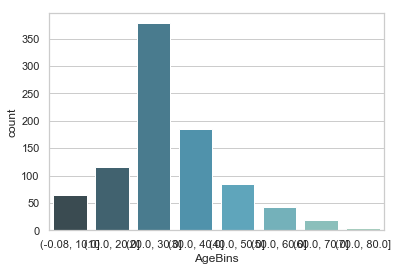

In [32]:
sns.countplot(x="AgeBins", data = train, palette = "GnBu_d");

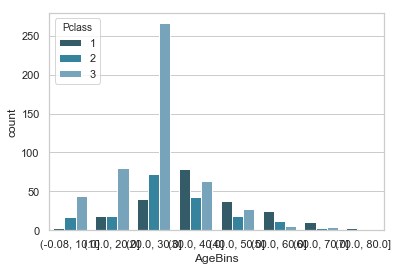

In [33]:
sns.countplot( x ="AgeBins", hue="Pclass", data = train, palette="PuBuGn_d");

In [34]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBins
0,0,3,"Braund, Mr. Owen Harris",1,2,1,0,7.2500,S,"(20.0, 30.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,71.2833,C,"(30.0, 40.0]"
2,1,3,"Heikkinen, Miss. Laina",0,2,0,0,7.9250,S,"(20.0, 30.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,1,0,53.1000,S,"(30.0, 40.0]"
4,0,3,"Allen, Mr. William Henry",1,3,0,0,8.0500,S,"(30.0, 40.0]"


Because we have transformed the age values into 8 categorical values, we don't need the AgeBins feature that we have created above. so we can drop it

In [35]:
train = train.drop(['AgeBins'], axis = 1)
train_test_data = [train, test]
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,2,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",0,2,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",1,3,0,0,8.0500,S


##  2. 4. Family Size (SibSp + Parch)

- No missing data
- Discrete variable
- If we assume the survival is dependent on the family size and to analyze this assumption, we will combine SibSp (# of siblings / Spouses aboard ) and Parch (# of parents  / children aboard ) features together.

In [36]:
SibSp = pd.crosstab([train.Survived], train.SibSp)
plotGraph(SibSp, 'Survived based on SibSp')

In [37]:
Parch = pd.crosstab([train.Survived], train.Parch)
plotGraph(Parch, 'Survived based on Parch')

In [38]:
for dataset in train_test_data:
    dataset["FamilySize"] = dataset['SibSp'] + dataset['Parch']
train, test = train_test_data[0], train_test_data[1]
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",1,2,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",0,2,0,0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,1,0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",1,3,0,0,8.0500,S,0


- FamilySize feature correlation with survival by pivoting on FamilySize feature

In [39]:
train[['FamilySize', 'Survived']].groupby(['FamilySize'], 
                                        as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


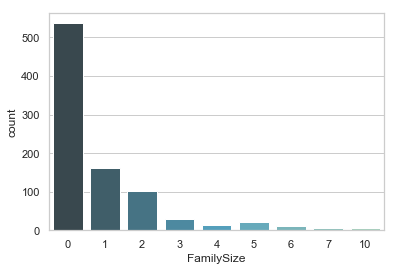

In [40]:
sns.countplot(x="FamilySize", data = train, palette = "GnBu_d");

-We are considering the FamilySize feature. So we don't need the SibSp, and Parch. We will drop them next in favor of FamilySize

In [41]:
train = train.drop(['Parch', 'SibSp'], axis = 1)
test = test.drop(['Parch', 'SibSp'], axis = 1)
train_test_data = [train, test]
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",1,2,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",0,2,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",1,3,8.0500,S,0


In [42]:
test.head()

,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,3,"Kelly, Mr. James",1,3,7.8292,Q,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,4,7.0000,S,1
2,2,"Myles, Mr. Thomas Francis",1,6,9.6875,Q,0
3,3,"Wirz, Mr. Albert",1,2,8.6625,S,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,2,12.2875,S,2


##  2. 5. Embarked

- 2 missing data
- Categorical variable
- The embarking feature takes S, Q and C categorical values for port embarkation. 
- The missing values are filled using the most frequent value

In [43]:
embarked = pd.crosstab([train.Survived], train.Embarked)
plotGraph(embarked, 'Survived based on embarked')

In [44]:
Embarking_freq = train.Embarked.dropna().mode()[0]
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna(Embarking_freq)
train, test = train_test_data[0], train_test_data[1]
train.head()   

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",1,2,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",0,2,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",1,3,8.0500,S,0


- Embarked feature correlation with survival by pivoting on embarked feature

In [45]:
train[['Embarked', 'Survived']].groupby(['Embarked'], 
                                       as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


#### Transform the Embarked categorical values into discrete numeric values   (S = 0, C = 1, and Q = 2 )

In [46]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",1,2,7.2500,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,71.2833,1,1
2,1,3,"Heikkinen, Miss. Laina",0,2,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,53.1000,0,1
4,0,3,"Allen, Mr. William Henry",1,3,8.0500,0,0


##  2. 6. Fare

- The train data has no missing data
- The test data has one missing value and we will replace it with the most frequent
- This is a continuous feature 
- We will lamp the fare feature into bins to develop the predictive model
- We use qcut method from pandas to divide the fare into ranges

In [47]:
Fare = pd.crosstab([train.Survived],train.Fare)
plotLine(Fare,'Survival based on Fare')

In [48]:
Fare_freq = test.Fare.dropna().mode()[0]
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(Fare_freq)

- Fare feature correlation with Survival by pivoting on Fare feature

In [49]:
train['FareBins'] = pd.qcut(train['Fare'], 5)
train[['FareBins', 'Survived']].groupby(['FareBins'], 
                                        as_index = False).mean().sort_values(by = 'Survived', ascending = True)

,FareBins,Survived
1,"(7.854, 10.5]",0.201087
0,"(-0.001, 7.854]",0.217877
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


- Transforming the Fare feature into ordinal values based in the FareBins

In [50]:
for dataset in train_test_data:    
    dataset.loc[dataset['Fare']  <=7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.84)   & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5)   & (dataset['Fare'] <= 21.679), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 39.688) & (dataset['Fare'] <= 5512.329), 'Fare'] = 4

In [51]:
train, test = train_test_data[0], train_test_data[1]
train = train.drop(['FareBins'], axis = 1)
train.head(6)

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",1,2,0.0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,4.0,1,1
2,1,3,"Heikkinen, Miss. Laina",0,2,1.0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,4.0,0,1
4,0,3,"Allen, Mr. William Henry",1,3,1.0,0,0
5,0,3,"Moran, Mr. James",1,2,1.0,2,0


In [52]:
test.head(6)

,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,3,"Kelly, Mr. James",1,3,0.0,2,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,4,0.0,0,1
2,2,"Myles, Mr. Thomas Francis",1,6,1.0,2,0
3,3,"Wirz, Mr. Albert",1,2,1.0,0,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,2,2.0,0,2
5,3,"Svensson, Mr. Johan Cervin",1,1,1.0,0,0


##  2. 7. Title

##### For our data analysis and developing the predictive model, the full name doesn't have importance but I assume the title does.  So, let us extract the title of each person and add a new  feature  "Title"

In [53]:
def extract_title(df):
    # the Name feature includes last name, title, and first name. After splitting 
    # the title is in the second column or at index 1
    df["Title"] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip()) 
    return df
train = extract_title(train)
test = extract_title(test)

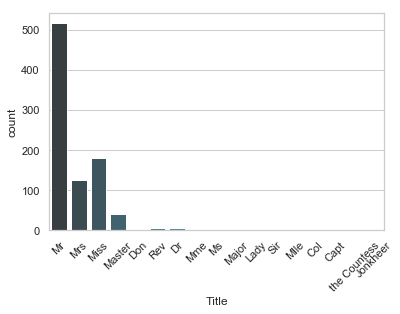

In [54]:
fig = sns.countplot(x = 'Title', data = train, palette = "GnBu_d")
fig = plt.setp(fig.get_xticklabels(), rotation = 45)

![](http://)- Looking at the figure, some of the titles were used only once and we will lamped them 

In [55]:
#for dset in train:
train_test_data = [train, test]
for dset in train_test_data:
    dset["Title"] = dset["Title"].replace(["Melkebeke", "Countess", "Capt", "the Countess", "Col", "Don",
                                         "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"] , "Lamped")
    dset["Title"] = dset["Title"].replace(["Lady", "Mlle", "Ms", "Mme"] , "Miss")


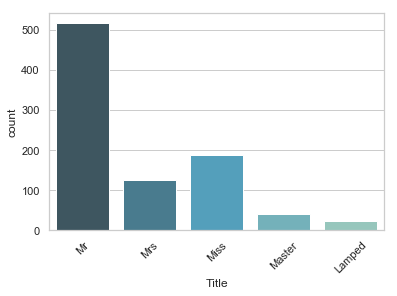

In [56]:
fig2 = sns.countplot(x = 'Title', data = train, palette = "GnBu_d")
fig2 = plt.setp(fig2.get_xticklabels(), rotation = 45)

- Title has Mr, Mrs, Miss, Master, and Lamped categorical variables with the most frequent being Mr
- Title feature correlation with survival by pivoting on title feature

In [57]:
train[['Title', 'Survived']].groupby(['Title'], 
                                        as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
4,Mrs,0.792000
2,Miss,0.705882
1,Master,0.575000
0,Lamped,0.318182
3,Mr,0.156673


- Map the categorical title feature into numerical values (Mr = 1, Miss = 2, Mrs = 3, Master = 4, Lamped = 5) 

In [58]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map({'Mr': 1, 'Miss': 2, 'Mrs': 3, 
                                             'Master': 4, 'Lamped': 5}).astype(int)
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,Title
0,0,3,"Braund, Mr. Owen Harris",1,2,0.0,0,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,4.0,1,1,3
2,1,3,"Heikkinen, Miss. Laina",0,2,1.0,0,0,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,4.0,0,1,3
4,0,3,"Allen, Mr. William Henry",1,3,1.0,0,0,1


In [59]:
train.drop(['Name'], axis = 1, inplace = True)
test.drop(['Name'], axis=1, inplace = True)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,0,3,1,2,0.0,0,1,1
1,1,1,0,3,4.0,1,1,3
2,1,3,0,2,1.0,0,0,2
3,1,1,0,3,4.0,0,1,3
4,0,3,1,3,1.0,0,0,1


## 2.8 Heat map for correlation between features

In the next figure, we will see the correlation among all features using a heat map.

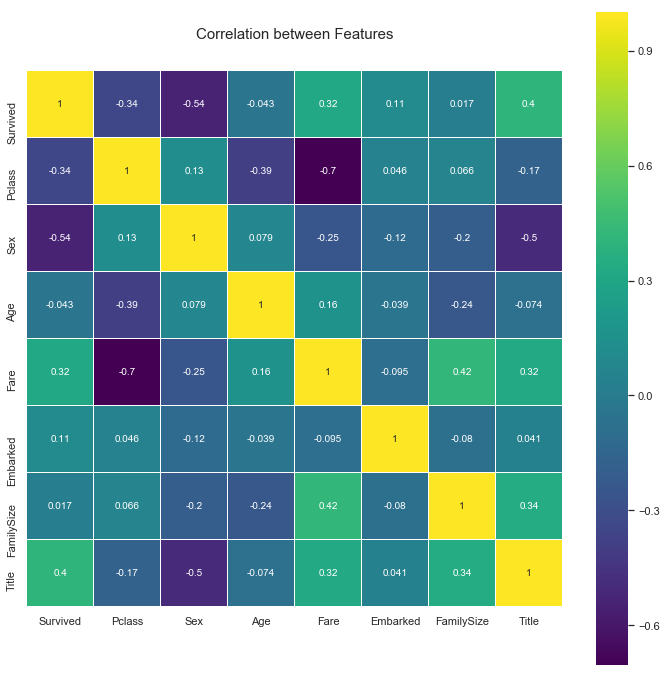

In [60]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation between Features', y=1.05, size = 15)
sns.heatmap(train.corr(),
            linewidths=0.1, 
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True)

The figure shows the linear relationship between the individual features vs survival and also between each feature. Example, Pclass vs Survival corr_coef is - 0.34 that means they have -ve leaner relationship. Pclass = 1 has higher survival rate than Pclass = 3.  +Ve corr_coef_ mean the two variables have +ve linear relationship and -ve mean they have -ve linear relationship (slope = -ve), close to zero mean they are not correlated, close to +1 or -1 mean they are strongly positively and negatively correlated, respectively. 

# 3. Machine Learning Algorithms

We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms.Following are the algorithms I will use to make the model:

1. Logistic Regression

2. Support Vector Machines (Linear and radial)

3. Random Forest

4. K-Nearest Neighbours

5. Naive Bayes

6. Decision Tree

7. Logistic Regression

8. Perceptron

9. Stochastic Gradient Descent

Next, I will feed these features into various classification algorithms to determine the best performance using a simple framework: **Split, Fit, Predict, Score It.**

In [61]:
# Split data to be used in the models
# Create matrix of features
x = train.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = train['Survived'] # y is the column we're trying to predict

# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

In [62]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

rand_class = np.random.choice([0, 1], size=y_train.shape)
dummy_class = np.ones(shape=y_train.shape) - 1
acc = np.sum(y_train == dummy_class)/len(y_train)
print(acc)
print(roc_auc_score(y_train, rand_class))

0.6320224719101124
0.4853859202714164


Random and dummy classifiers metrics, we should not do worse than that !

## 3.1. Logistic Regression

In [63]:
from sklearn import metrics #accuracy measure

model = LogisticRegression()
model.fit(x_train,y_train)
prediction1 = model.predict(x_test)

#Accuracy
accuracy1 = metrics.accuracy_score(prediction1,y_test)
print('The accuracy of the Logistic Regression is',accuracy1)

print('--'*40)

# Classification Report
print('Classification Report:')
print(classification_report(y_test,prediction1))

print('--'*40)

# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, model.predict_proba(x_test)[:,1])

# Calculate the AUC
roc_auc = auc(FPR, TPR)
print ('ROC : %0.3f' % roc_auc , '%')

The accuracy of the Logistic Regression is 0.8044692737430168
--------------------------------------------------------------------------------
Classification Report:
             precision    recall  f1-score   support

          0       0.78      0.91      0.84        99
          1       0.86      0.68      0.76        80

avg / total       0.81      0.80      0.80       179

--------------------------------------------------------------------------------
ROC : 0.871 %


## 3.2.1. Support Vector Machines Linear

In [64]:
from sklearn import svm #support vector Machine

model=svm.SVC(kernel='linear',C=0.1,gamma=0.1, probability= True)
model.fit(x_train,y_train)
prediction2=model.predict(x_test)

#Accuracy
accuracy2 = metrics.accuracy_score(prediction2,y_test)
print('Accuracy for linear SVM is',accuracy2)

print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test,prediction2))

print('--'*40)

# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, model.predict_proba(x_test)[:,1])

# Calculate the AUC
roc_auc = auc(FPR, TPR)
print ('ROC : %0.3f' % roc_auc , '%')

Accuracy for linear SVM is 0.7988826815642458
--------------------------------------------------------------------------------
Classification Report
             precision    recall  f1-score   support

          0       0.78      0.88      0.83        99
          1       0.82      0.70      0.76        80

avg / total       0.80      0.80      0.80       179

--------------------------------------------------------------------------------
ROC : 0.869 %


## 3.2.2. Support Vector Machines Rbf

In [65]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1, probability=True)
model.fit(x_train,y_train)
prediction3=model.predict(x_test)

#Accuracy
accuracy3 = metrics.accuracy_score(prediction3,y_test)
print('Accuracy for rbf SVM is ',accuracy3)

print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test,prediction3))

print('--'*40)

# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, model.predict_proba(x_test)[:,1])

# Calculate the AUC
roc_auc = auc(FPR, TPR)
print ('ROC : %0.3f' % roc_auc , '%')

Accuracy for rbf SVM is  0.8324022346368715
--------------------------------------------------------------------------------
Classification Report
             precision    recall  f1-score   support

          0       0.79      0.94      0.86        99
          1       0.90      0.70      0.79        80

avg / total       0.84      0.83      0.83       179

--------------------------------------------------------------------------------
ROC : 0.885 %


## 3.3. Decision Tree

In [66]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
prediction4 = model.predict(x_test)

#Accuracy
accuracy4 = metrics.accuracy_score(prediction4,y_test)
print('The accuracy of the Decision Tree is',accuracy4)

print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test,prediction4))

print('--'*40)

# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, model.predict_proba(x_test)[:,1])

# Calculate the AUC
roc_auc = auc(FPR, TPR)
print ('ROC : %0.3f' % roc_auc , '%')

The accuracy of the Decision Tree is 0.7988826815642458
--------------------------------------------------------------------------------
Classification Report
             precision    recall  f1-score   support

          0       0.77      0.90      0.83        99
          1       0.84      0.68      0.75        80

avg / total       0.81      0.80      0.80       179

--------------------------------------------------------------------------------
ROC : 0.798 %


## 3.4. K-Nearest Neighbours (KNN)

In [67]:
# Standardize the Variables

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create instance of standard scaler
scaler = StandardScaler()

# Fit scaler object to feature columns
scaler.fit(train.drop('Survived', axis = 1)) # Everything but target variable 

# Use scaler object to do a transform columns
scaled_features = scaler.transform(train.drop('Survived', axis = 1)) # performs the standardization by centering and scaling
scaled_features

array([[ 0.82737724,  0.73769513, -0.27924861, ..., -0.56883712,
         0.05915988, -0.70777314],
       [-1.56610693, -1.35557354,  0.4816398 , ...,  1.00518113,
         0.05915988,  1.24765591],
       [ 0.82737724, -1.35557354, -0.27924861, ..., -0.56883712,
        -0.56097483,  0.26994139],
       ...,
       [ 0.82737724, -1.35557354, -0.27924861, ..., -0.56883712,
         1.29942929,  0.26994139],
       [-1.56610693,  0.73769513, -0.27924861, ...,  1.00518113,
        -0.56097483, -0.70777314],
       [ 0.82737724,  0.73769513,  0.4816398 , ...,  2.57919938,
        -0.56097483, -0.70777314]])

In [68]:
# Use scaled features variable to re-create a features dataframe
df_feat = pd.DataFrame(scaled_features, columns = train.columns[:-1])

In [69]:
# Split

# Import
from sklearn.model_selection import train_test_split

# Create matrix of features
x = df_feat

# Create target variable
y = train['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

In [70]:
model = KNeighborsClassifier() 
model.fit(x_train,y_train)
prediction5 = model.predict(x_test)

#Accuracy
accuracy5 = metrics.accuracy_score(prediction5,y_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,y_test))

print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test,prediction5))

print('--'*40)

# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, model.predict_proba(x_test)[:,1])

# Calculate the AUC
roc_auc = auc(FPR, TPR)
print ('ROC : %0.3f' % roc_auc , '%')

The accuracy of the KNN is 0.8044692737430168
--------------------------------------------------------------------------------
Classification Report
             precision    recall  f1-score   support

          0       0.78      0.91      0.84        99
          1       0.86      0.68      0.76        80

avg / total       0.81      0.80      0.80       179

--------------------------------------------------------------------------------
ROC : 0.870 %


**KNN Parameter Tuning**  
With a precision of 80.44%, the model's performance is accepatable using k = 5, but could be improved by choosing a better k value.  

The best way to identify the optimal k value is with the 'Elbow' method, which interates many models using different k values and plots their error rates. The k with the lowest error rate is the optimal value we want to use.  

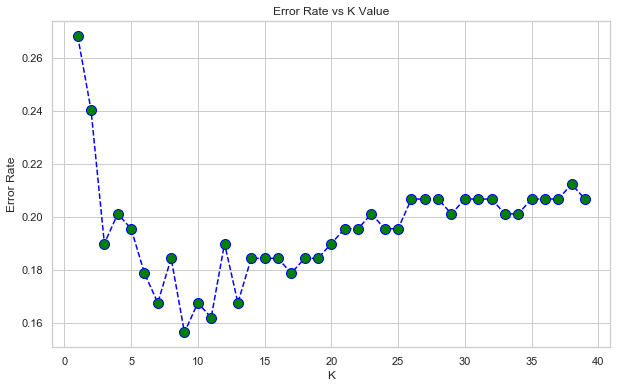

In [71]:
# Function
error_rate = []

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot error rate
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', marker = 'o', 
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

At k=9, the error rate is at it's lowest, making 9 the optimal value for k.  I will retrain and test the model accordingly.  

In [72]:
# Fit new KNN
# Create model object
model = KNeighborsClassifier(n_neighbors = 9)

# Fit new KNN on training data
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [73]:
# Predict new KNN
prediction5b = model.predict(x_test)

In [74]:
# Score it with new KNN
print('K-Nearest Neighbors(KNN)')
print('k = 9')

print('--'*40)

#Accuracy
accuracy5b = metrics.accuracy_score(prediction5b,y_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5b,y_test))

# Classification Report
print('--'*40)
print('Classfication Report',classification_report(y_test, prediction5b))

#Roc Accuracy
print('--'*40)

# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, model.predict_proba(x_test)[:,1])

# Calculate the AUC
roc_auc = auc(FPR, TPR)
print ('ROC : %0.3f' % roc_auc , '%')

K-Nearest Neighbors(KNN)
k = 9
--------------------------------------------------------------------------------
The accuracy of the KNN is 0.8435754189944135
--------------------------------------------------------------------------------
Classfication Report              precision    recall  f1-score   support

          0       0.80      0.96      0.87        99
          1       0.93      0.70      0.80        80

avg / total       0.86      0.84      0.84       179

--------------------------------------------------------------------------------
ROC : 0.882 %


## 3.5. Gaussian Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB #Naive bayes

model = GaussianNB()
model.fit(x_train,y_train)
prediction6 = model.predict(x_test)

#Accuracy
accuracy6 =  metrics.accuracy_score(prediction6,y_test)
print('The accuracy of the NaiveBayes is',accuracy6)

print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test,prediction6))

print('--'*40)

# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, model.predict_proba(x_test)[:,1])

# Calculate the AUC
roc_auc = auc(FPR, TPR)
print ('ROC : %0.3f' % roc_auc , '%')

The accuracy of the NaiveBayes is 0.8044692737430168
--------------------------------------------------------------------------------
Classification Report
             precision    recall  f1-score   support

          0       0.81      0.84      0.83        99
          1       0.79      0.76      0.78        80

avg / total       0.80      0.80      0.80       179

--------------------------------------------------------------------------------
ROC : 0.859 %


## 3.6. Random Forests

In [76]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
prediction7 = model.predict(x_test)

#Accuracy
accuracy7 = metrics.accuracy_score(prediction7,y_test)
print('The accuracy of the Random Forests is',accuracy7)

print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test,prediction7))

print('--'*40)

# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, model.predict_proba(x_test)[:,1])

# Calculate the AUC
roc_auc = auc(FPR, TPR)
print ('ROC : %0.3f' % roc_auc , '%')

The accuracy of the Random Forests is 0.8156424581005587
--------------------------------------------------------------------------------
Classification Report
             precision    recall  f1-score   support

          0       0.80      0.89      0.84        99
          1       0.84      0.72      0.78        80

avg / total       0.82      0.82      0.81       179

--------------------------------------------------------------------------------
ROC : 0.867 %


## 3.7. Perceptron

In [77]:
model=Perceptron()
model.fit(x_train,y_train)
prediction8=model.predict(x_test)

#Accuracy
accuracy8 = metrics.accuracy_score(prediction8,y_test)
print('The accuracy of the Perceptron is',accuracy8)

print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test,prediction8))

print('--'*40)

# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, model.decision_function(x_test))

# Calculate the AUC
roc_auc = auc(FPR, TPR)
print ('ROC : %0.3f' % roc_auc , '%')

The accuracy of the Perceptron is 0.6871508379888268
--------------------------------------------------------------------------------
Classification Report
             precision    recall  f1-score   support

          0       0.73      0.69      0.71        99
          1       0.64      0.69      0.66        80

avg / total       0.69      0.69      0.69       179

--------------------------------------------------------------------------------
ROC : 0.746 %


## 3.8. Stochastic Gradient Descent

In [93]:
model=SGDClassifier()
model.fit(x_train,y_train)
prediction9=model.predict(x_test)

#Accuracy
accuracy9 = metrics.accuracy_score(prediction9,y_test)
print('The accuracy of the SGD is',accuracy9)

print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test,prediction9))

print('--'*40)

# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, model.decision_function(x_test))

# Calculate the AUC
roc_auc = auc(FPR, TPR)
print ('ROC : %0.3f' % roc_auc , '%')

The accuracy of the SGD is 0.6480446927374302
--------------------------------------------------------------------------------
Classification Report
             precision    recall  f1-score   support

          0       0.63      0.87      0.73        99
          1       0.70      0.38      0.49        80

avg / total       0.66      0.65      0.62       179

--------------------------------------------------------------------------------
ROC : 0.697 %


The accuracy of a model is not the only factor that determines the robustness of the classifier. Let's say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.

Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over??. The answer is No, because we can't determine which all instances will the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as model variance.

To overcome this and get a generalized model, we use Cross Validation

## 4. Evaluating Predictive Models

In [79]:
models = pd.DataFrame({
     'Model': ['Logistic Regression', 'Linear SVC','Rbf SVC',
               'Decision Tree', 'K-Nearest Neighbours', 'Gaussian Naive Bayes', 'Random Forests', 'Perceptron', 'Stochastic Gradient Descent'],
    'Score': [accuracy1, accuracy2,accuracy3,
               accuracy4, accuracy5b, accuracy6, accuracy7, accuracy8, accuracy9]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,K-Nearest Neighbours,0.843575
2,Rbf SVC,0.832402
8,Stochastic Gradient Descent,0.832402
6,Random Forests,0.815642
0,Logistic Regression,0.804469
5,Gaussian Naive Bayes,0.804469
1,Linear SVC,0.798883
3,Decision Tree,0.798883
7,Perceptron,0.687151


## 5.1. Cross Validation

Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.

1. The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

2. Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.

3. We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

This is called K-Fold Cross Validation.

4. An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model

In [80]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction


X=train[train.columns[1:]]
Y=train['Survived']

kfold = KFold(n_splits=5, random_state=22) # k=5, split the data into 5 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest', 'Perceptron', 'Stochastic Gradient Descent']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100), Perceptron(), SGDClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.790089,0.029209
Radial Svm,0.824901,0.025066
Logistic Regression,0.810351,0.020264
KNN,0.804745,0.018207
Decision Tree,0.783397,0.017154
Naive Bayes,0.785701,0.033231
Random Forest,0.810320,0.018312
Perceptron,0.738642,0.073207
Stochastic Gradient Descent,0.705926,0.045993


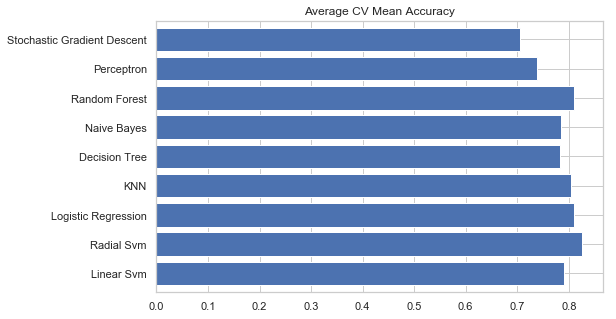

In [81]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

## 5.2. Confusion Matrix

It gives the number of correct and incorrect classifications made by the classifier.

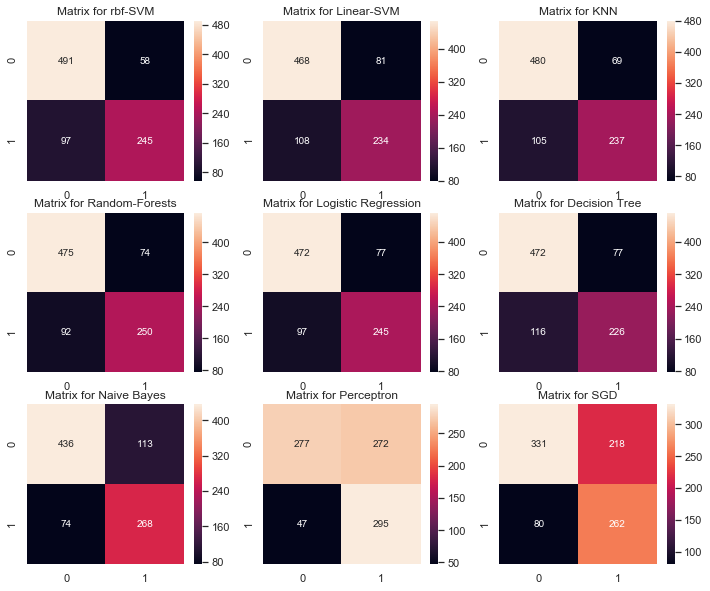

In [82]:
from sklearn.metrics import confusion_matrix


f,ax = plt.subplots(3,3,figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

y_pred = cross_val_predict(Perceptron(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,1],annot=True,fmt='2.0f')
ax[2,1].set_title('Matrix for Perceptron')

y_pred = cross_val_predict(SGDClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,2],annot=True,fmt='2.0f')
ax[2,2].set_title('Matrix for SGD')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

**Interpreting Confusion Matrix**

The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made. Lets consider the first plot for rbf-SVM:

1. The no. of correct predictions are 491(for dead) + 245(for survived) with the mean CV accuracy being (491+245)/891 = 82.4% which we did get earlier.

2. Errors--> Wrongly Classified 58 dead people as survived and 97 survived as dead. Thus it has made more mistakes by predicting dead as survived.

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes, SGD, Perceptron has a higher chance in correctly predicting passengers who survived.

## 5.3. Hyper-Parameters Tuning

The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.

We will tune the hyper-parameters for the 2 best classifiers i.e the SVM and RandomForests.

### 5.3.1. SVM

In [83]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
0.8305274971941639
SVC(C=0.4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   12.3s finished


### 5.3.2. Random Forests

In [84]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   35.6s finished


0.8080808080808081
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


The best score for Rbf-Svm is **83.05%** with C=0.4 and gamma=0.3. For RandomForest, score is abt **80.8%** with n_estimators=600.

## 5.4. Ensembling

Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.

Lets say we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is Ensembling, which improves the stability of the model. Ensembling can be done in ways like:

1. Voting Classifier

2. Bagging

3. Boosting.

### 5.4.1. Voting Classifier

It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of diiferent types.

In [85]:
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=7)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.4,gamma=0.3)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('svm',svm.SVC(kernel='linear',probability=True))], voting='soft').fit(x_train,y_train)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(x_test,y_test))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

/usr/local/anaconda3/envs/szczygiel/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



The accuracy for ensembled model is: 0.8324022346368715


/usr/local/anaconda3/envs/szczygiel/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/usr/local/anaconda3/envs/szczygiel/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/usr/local/anaconda3/envs/szczygiel/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/usr/local/anaconda3/envs/szczygiel/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth va

The cross validated score is 0.8204335489728749


/usr/local/anaconda3/envs/szczygiel/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



## 5.4.2. Bagging

Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging,there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.


** Bagged DecisionTree**

In [86]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(x_train,y_train)
prediction=model.predict(x_test)

print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,y_test))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8044692737430168
The cross validated score for bagged Decision Tree is: 0.8047653501305186


## 5.4.3. Boosting

Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model.Boosting works as follows:

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy.

**5.4.3.1. AdaBoost (Adaptive Boosting)**

The weak learner or estimator in this case is a Decsion Tree. But we can change the dafault base_estimator to any algorithm of our choice.

In [87]:
from sklearn.ensemble import AdaBoostClassifier 

ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8238040517534898


**5.4.3.2. Stochastic Gradient Boosting**

Here too the weak learner is a Decision Tree

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8126174668028601


**5.4.3.3. XGBoost**

In [89]:
import xgboost as xg  

xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

/usr/local/anaconda3/envs/szczygiel/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/usr/local/anaconda3/envs/szczygiel/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/usr/local/anaconda3/envs/szczygiel/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/usr/local/anaconda3/envs/szczygiel/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth va

The cross validated score for XGBoost is: 0.8160265577119509


/usr/local/anaconda3/envs/szczygiel/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



We got the highest accuracy for AdaBoost. We will try to increase it with Hyper-Parameter Tuning

**Hyper-Parameter Tuning for AdaBoost**

In [90]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  6.3min finished


0.8181818181818182
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=200, random_state=None)


The maximum accuracy we can get with AdaBoost is 82.38% with n_estimators=200 and learning_rate=0.05

## 5.4.4. Confusion Matrix for the Best Model of Boosting 

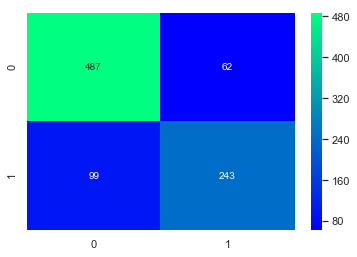

In [91]:
ada = AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## 6. Feature Importance

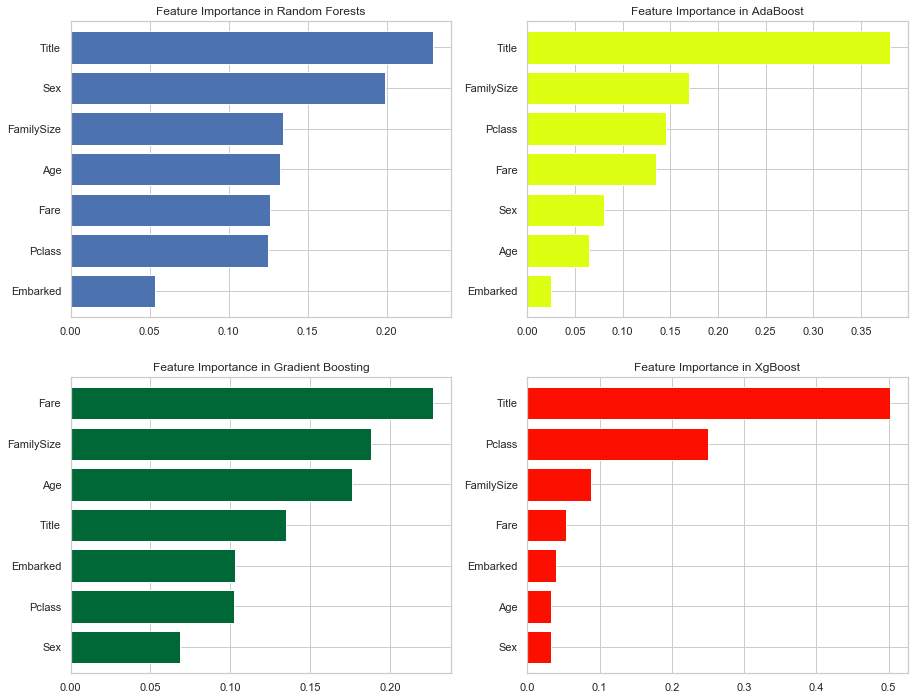

In [92]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

We can see the important features for various classifiers like RandomForests, AdaBoost,etc.

**Observations:**
1. Some of the common important features are Initial,Fare_cat,Pclass,Family_Size.

2. The Sex feature doesn't seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only in RandomForests.

3. Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone,Parch and SibSp.

 ### **AND THE WINNER IS...**
K-Nearest Neighbors with K = 9 with the highest overall performance in accuracy, recall, and precision (~ 84% across the board).  The other classification models also performed well, but were a few percentage points lower in their evaluation metrics.  Additional parameter tuning could improve each model's performance even more, but this initial analysis proved to be a good starting point. We tried to improve decision tree by paramter tuning (~ 83 %), bui it is still worse than KNN. 